# Laboratorio de datos

## Clase 2

### Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Dataset

In [110]:
Espacios = 'arbolado-en-espacios-verdes.csv'

df_Espacios = pd.read_csv(Espacios, index_col = 2)

In [111]:
df_Veredas = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')

C:\Users\tomas\AppData\Local\Temp\ipykernel_13144\2890767425.py:1: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Veredas = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')


### Ejercicios

#### Ejercicio 1.

1. Escribir una función generala_tirar() que simule una tirada de dados para el juego de la generala. Es decir, debe 
devolver una lista aleatoria de 5 valores de dados. Por ejemplo [2,3,2,1,6]

In [5]:
import random 

def generala_tirar():
    Tirada = []
    for i in range(0,5):
        Tirada.append(random.randint(1,6))
    return Tirada

generala_tirar()

[6, 1, 6, 6, 6]

#### Ejercicio 2.

2. Agregar al ejercicio generala_tirar() que además imprima en pantalla si salió poker, full, generala, escalera o 
ninguna de las anteriores. Por ejemplo, si sale 2,1,1,2,2 debe devolver [2,1,1,2,2] e imprimir en pantalla Full

In [19]:
def generala_tirar():
    Tirada = []
    for i in range(0,5):
        Tirada.append(random.randint(1,6))

    Veces = []

    for i in range(1,7):
        Veces.append(Tirada.count(i))

    if 5 in Veces:
        print('Generala')
        print(Tirada)
        return Tirada
    elif 4 in Veces:
        print('Poker')
        print(Tirada)
        return Tirada
    elif 3 in Veces and 2 in Veces:
        print('Full')
        print(Tirada)
        return Tirada
    elif Veces.count(1) == 5:
        if Veces[0] == 0 or Veces[5] == 0:
            print('Escalera')
            print(Tirada)
            return Tirada
    else:
        print('No salió nada')
        print(Tirada)
        return Tirada

#### Ejercicio 3.

3. Escribir un programa que recorra las líneas del archivo ‘datame.txt’ e imprima solamente las líneas que contienen la 
palabra ‘estudiante’ .

In [20]:
with open('datame.txt', 'rt', encoding='utf-8') as Archivo:
    for Linea in Archivo:
        if 'estudiante' in Linea:
            print (Linea)

– Ser un lugar de encuentro entre todos/as los/as que nos sentimos cercanos a LCD ya sea por ser estudiantes de la carrera o carrera cercanas, docentes, investigadores/as interesados/as o simplemente amigos/as de LCD.

– Ofrecer a estudiantes de la carrera un panorama amplio de posibles caminos que puede recorrer un/a especialista en ciencias de datos.

– Exponer a estudiantes de LCD a importantes referentes de la disciplina que trabajan en diversos ámbitos (investigación científica, empresas, organismos estatales, ONGs, etc. )

Está destinado principalmente a estudiantes de la carrera, pero todas/os somos bienvenidas/os.



#### Ejercicio 4.

4. Utilizando el archivo cronograma_sugerido , armar una lista de las materias del cronograma, llamada “lista_materias ”.

In [21]:
import pandas as pd

In [24]:
Cronograma = pd.read_csv('cronograma_sugerido.csv')
Cronograma.columns

Index(['Cuatrimestre', 'Asignatura', 'Correlatividad de Asignaturas'], dtype='object')

In [27]:
Lista_Materias = []

for Materias in Cronograma['Asignatura']:
    Lista_Materias.append(Materias)

Cronograma

,Cuatrimestre,Asignatura,Correlatividad de Asignaturas
0,3,Álgebra I,CBC
1,3,Algoritmos y Estructuras de Datos I,CBC
2,4,Análisis I,CBC
3,4,Electiva de Introducción a las Ciencias Naturales,CBC
4,5,Análisis II,Análisis I
5,5,Álgebra Lineal Computacional,Álgebra I – Algoritmos y Estructuras de Datos I
6,5,Laboratorio de Datos,Algoritmos y Estructuras de Datos I
7,6,Análisis Avanzado,"Análisis II, Álgebra I"
8,6,Algoritmos y Estructuras de Datos II,Algoritmos y Estructuras de Datos I
9,7,Probabilidad,Análisis Avanzado


#### Ejercicio 5.

5. Luego, definir una función “cuantas_materias (n)” que, dado un número de cuatrimestre (n entre 3 y 8), devuelva la 
cantidad de materias a cursar en ese cuatrimestre. Por ejemplo  cuantas_materias(5) debe devolver 3.

In [32]:
def cuantas_materias(n):
    if n >= 3 and n <= 8:
        return Cronograma['Cuatrimestre'].tolist().count(n)
    else:
        print('No es un n válido')

cuantas_materias(8)

3

#### Ejercicio 6.

6. Definir una función materias_cuatrimestre(nombre_archivo, n) que recorra el archivo indicado, conteniendo 
información de un cronograma sugerido de cursada, y devuelva una lista de diccionarios con la información de las materia 
sugeridas para cursar el n-ésimo cuatrimestr.

In [48]:
def materias_cuatrimestre(Archivo, n):
    df = pd.read_csv(Archivo)
    Lista = []

    # Filtrar filas.
    df = df[df['Cuatrimestre'] == n]

    # Resetear index.
    df = df.reset_index()
    
    for i in range (0, len(df)):
        Diccionario = {}
        Diccionario['Materia'] = df.iloc[i, 2]
        Diccionario['Correlatividades'] = df.iloc[i, 3]
        Diccionario['Cuatrimestre sugerido'] = df.iloc[i, 1]
        print(Diccionario)

materias_cuatrimestre('cronograma_sugerido.csv', 5)

{'Materia': 'Análisis II', 'Correlatividades': 'Análisis I', 'Cuatrimestre sugerido': 5}
{'Materia': 'Álgebra Lineal Computacional', 'Correlatividades': 'Álgebra I – Algoritmos y Estructuras de Datos I', 'Cuatrimestre sugerido': 5}
{'Materia': 'Laboratorio de Datos', 'Correlatividades': 'Algoritmos y Estructuras de Datos I', 'Cuatrimestre sugerido': 5}


#### Ejercicio 7.

7. Definir una función materias_cuatrimestre(nombre_archivo, n) que recorra el archivo indicado, 
conteniendo información de un cronograma sugerido de cursada, y devuelva una lista de diccionarios con l 
información de las materias sugeridas para cursar el n-ésimo cuatrimestr

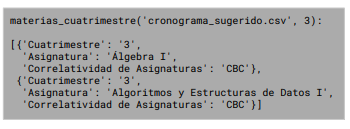e.

In [49]:
def materias_cuatrimestre(Archivo, n):
    df = pd.read_csv(Archivo)
    Lista = []

    # Filtrar filas.
    df = df[df['Cuatrimestre'] == n]

    # Resetear index.
    df = df.reset_index()
    
    for i in range (0, len(df)):
        Diccionario = {}
        Diccionario['Materia'] = df.iloc[i, 2]
        Diccionario['Correlatividades'] = df.iloc[i, 3]
        Diccionario['Cuatrimestre sugerido'] = df.iloc[i, 1]
        print(Diccionario)

#### Ejercicio 8.

Definir una función pisar_elemento(M,e) que tome una matriz de enteros M y un entero e y devuelva 
una matriz similar a M donde las entradas coincidentes con e fueron cambiadas por -1 
Por ejemplo si M = np.array([[0, 1, 2, 3], [4, 5, 6, 7]]) y e = 2, entonces la función
debe devolver la matriz np.array([[0, 1, -1, 3], [4, 5, 6, 7]]) 

In [53]:
import numpy as np 

def pisar_elemento(M,e):
    for i in range (0, len(M)):
        for k in range (0, len(M[i])):
            if M[i][k] == e:
                M[i][k] = -1
    return M

pisar_elemento(np.array([[1,2,3],[2,3,2]]), 2)

array([[ 1, -1,  3],
       [-1,  3, -1]])

#### Ejercicio 9.

9. Armar un dataframe que contenga las filas de Jacarandás y otro con los 
Palos Borrachos.

In [59]:
import pandas as pd

Archivo = "arbolado-en-espacios-verdes.csv"

In [63]:
# Armar df de csv.
df = pd.read_csv(Archivo)

# Columnas.
df.columns

Index(['long', 'lat', 'id_arbol', 'altura_tot', 'diametro', 'inclinacio',
       'id_especie', 'nombre_com', 'nombre_cie', 'tipo_folla', 'espacio_ve',
       'ubicacion', 'nombre_fam', 'nombre_gen', 'origen', 'coord_x',
       'coord_y'],
      dtype='object')

In [64]:
# Subdataframe con jacarandás.
Jacaranda = df[df['nombre_com'] == 'Jacarandá']

In [65]:
# Subdataframe con palos borrachos.
Borrachos = df[df['nombre_com'] == 'Palo borracho rosado']

#### Ejercicio 10.

10. Calcular para cada especie seleccionada:

- Cantidad de árboles, altura máxima, mínima y promedio, diámetro máximo, mínimo y promedio.
- Definir una función cantidad_arboles(parque) que, dado el nombre de un parque, calcule la cantidad de árboles que tiene.ene.

In [66]:
# Contar número de filas.
Arboles_Jacaranda = Jacaranda.count().max()
Arboles_Borrachos = Borrachos.count().max()

print(Arboles_Jacaranda)
print(Arboles_Borrachos)

3255
3150


In [67]:
# Altura máxima.
Max_Altura_Jacaranda = Jacaranda['altura_tot'].max()
Max_Altura_Borrachos = Borrachos['altura_tot'].max()

print(Max_Altura_Jacaranda)
print(Max_Altura_Borrachos)

49
47


In [68]:
# Altura mínima.
Min_Altura_Jacaranda = Jacaranda['altura_tot'].min()
Min_Altura_Borrachos = Borrachos['altura_tot'].min()

print(Min_Altura_Jacaranda)
print(Min_Altura_Borrachos)

1
0


In [69]:
# Promedio de altura.
Prom_Altura_Jacaranda = Jacaranda['altura_tot'].mean()
Prom_Altura_Borrachos = Borrachos['altura_tot'].mean()

print(Prom_Altura_Jacaranda)
print(Prom_Altura_Borrachos)

10.369585253456222
10.62984126984127


In [70]:
# Diámetro máximo.
Max_Diametro_Jacaranda = Jacaranda['diametro'].max()
Max_Diametro_Borrachos = Borrachos['diametro'].max()

print(Max_Diametro_Jacaranda)
print(Max_Diametro_Borrachos)

159
200


In [72]:
# Diámetro mínimo.
Min_Diametro_Jacaranda = Jacaranda['diametro'].min()
Min_Diametro_Borrachos = Borrachos['diametro'].min()

print(Min_Diametro_Jacaranda)
print(Min_Diametro_Borrachos)

1
1


In [73]:
# Promedio de diámetro.
Prom_Diametro_Jacaranda = Jacaranda['diametro'].mean()
Prom_Diametro_Borrachos = Borrachos['diametro'].mean()

print(Prom_Diametro_Jacaranda)
print(Prom_Diametro_Borrachos)

28.804301075268818
47.106031746031746


#### Ejercicio 11.

11. Definir una función cantidad_nativos (parque) que calcule la cantidad de
árboles nativos.

In [74]:
# Función para calcular árboles de cada parque.

def cantidad_arboles(parque):

    df_parque = df[df['espacio_ve'] == parque]
    Arboles = df_parque.count().max()

    return Arboles

cantidad_arboles('AVELLANEDA, NICOLÁS, Pres.')
cantidad_arboles('SICILIA')

782

In [75]:
# Función que calcula la cantidad de árboles nativos.

def cantidad_nativos(parque):

    df_parque = df[df['espacio_ve'] == parque]

    df_Nativos = df[df['origen'] == 'Nativo/Autóctono']

    Nativos = df_Nativos.count().max()

    return Nativos

cantidad_nativos('AVELLANEDA, NICOLÁS, Pres.')

17047